# **LC Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

import numpy as np
import pandas as pd

lc_dataset_path = '../../datasets/LendingClub/2007-2020Q3/Loan_status_2007-2020Q3.csv'
lc_prep_dataset_path = '../../datasets/preprocessed/lc/'

(CVXPY) Mar 04 02:01:30 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 04 02:01:30 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(lc_prep_dataset_path)

In [3]:
data = utilities.read_csv(lc_dataset_path)
data

/home/debian/DevOps/credit_scoring_benchmark/src/utilities.py:20: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(dataset_path, dtype=dtype)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    Unnamed: 0                                  int64  
 1    id                                          object 
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    object 
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

#### Fix column names formatting.

In [5]:
data.columns = data.columns.str.replace("_", "-")

#### Convert `int64` to `float94`.

In [6]:
utilities.int64_to_float64(data)

#### Convert `object` to `category`.

In [7]:
utilities.object_to_category(data)

#### Plot features data types.

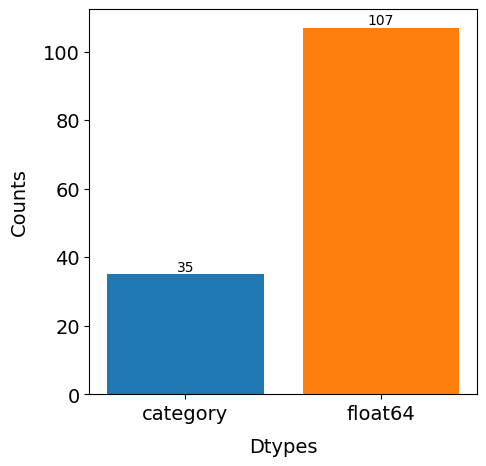

In [8]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=lc_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [9]:
before_data_cleaning_count = len(data)

#### Create `defaulted` feature from `loan_status` feature values.

In [10]:
data['loan-status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan-status, dtype: int64

In [11]:
data.defaulted = np.nan
data.loc[data['loan-status'].isin(['Fully Paid']), 'defaulted'] = False
data.loc[data['loan-status'].isin(['Charged Off', 'Default']), 'defaulted'] = True
data = data[data['defaulted'].isin([True, False])].copy()
data['defaulted'] = data['defaulted'].astype(bool)

data['defaulted'].value_counts()

False    1497783
True      362981
Name: defaulted, dtype: int64

#### Plot class distribution.

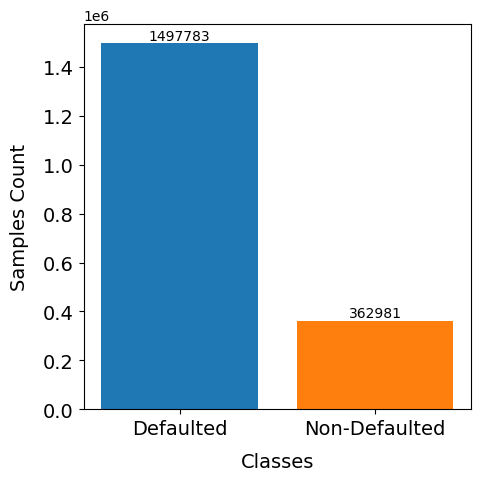

In [12]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=lc_prep_dataset_path + 'class_distribution.pdf')

#### Drop useless and ambiguous features and all features not known to investors ex ante.

In [13]:
data.drop(['Unnamed: 0', 'id', 'il-util', 'max-bal-bc', 'recoveries', 'total-rec-prncp', 'total-rec-int', 'loan-status', 'last-pymnt-d', 'last-pymnt-amnt', 'last-credit-pull-d', 'emp-title', 'pymnt-plan', 'url', 'title', 'out-prncp', 'out-prncp-inv', 'total-pymnt', 'total-pymnt-inv', 'total-rec-late-fee', 'collection-recovery-fee', 'collections-12-mths-ex-med', 'next-pymnt-d', 'last-fico-range-high', 'last-fico-range-low', 'collections-12-mths-ex-med', 'policy-code', 'open-acc-6m', 'open-act-il', 'mths-since-rcnt-il', 'total-bal-il', 'all-util', 'total-cu-tl', 'chargeoff-within-12-mths', 'num-bc-sats', 'num-sats', 'tot-hi-cred-lim', 'mths-since-recent-inq', 'hardship-flag', 'debt-settlement-flag'], axis=1, inplace=True)

#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [14]:
data.drop(['application-type', 'acc-now-delinq', 'delinq-amnt'], axis=1, inplace=True)

#### Handle special missing values.

In [15]:
utilities.replace_to_nan(data, "unknown")
utilities.replace_to_nan(data, "NONE")

#### Plot missing values histogram.

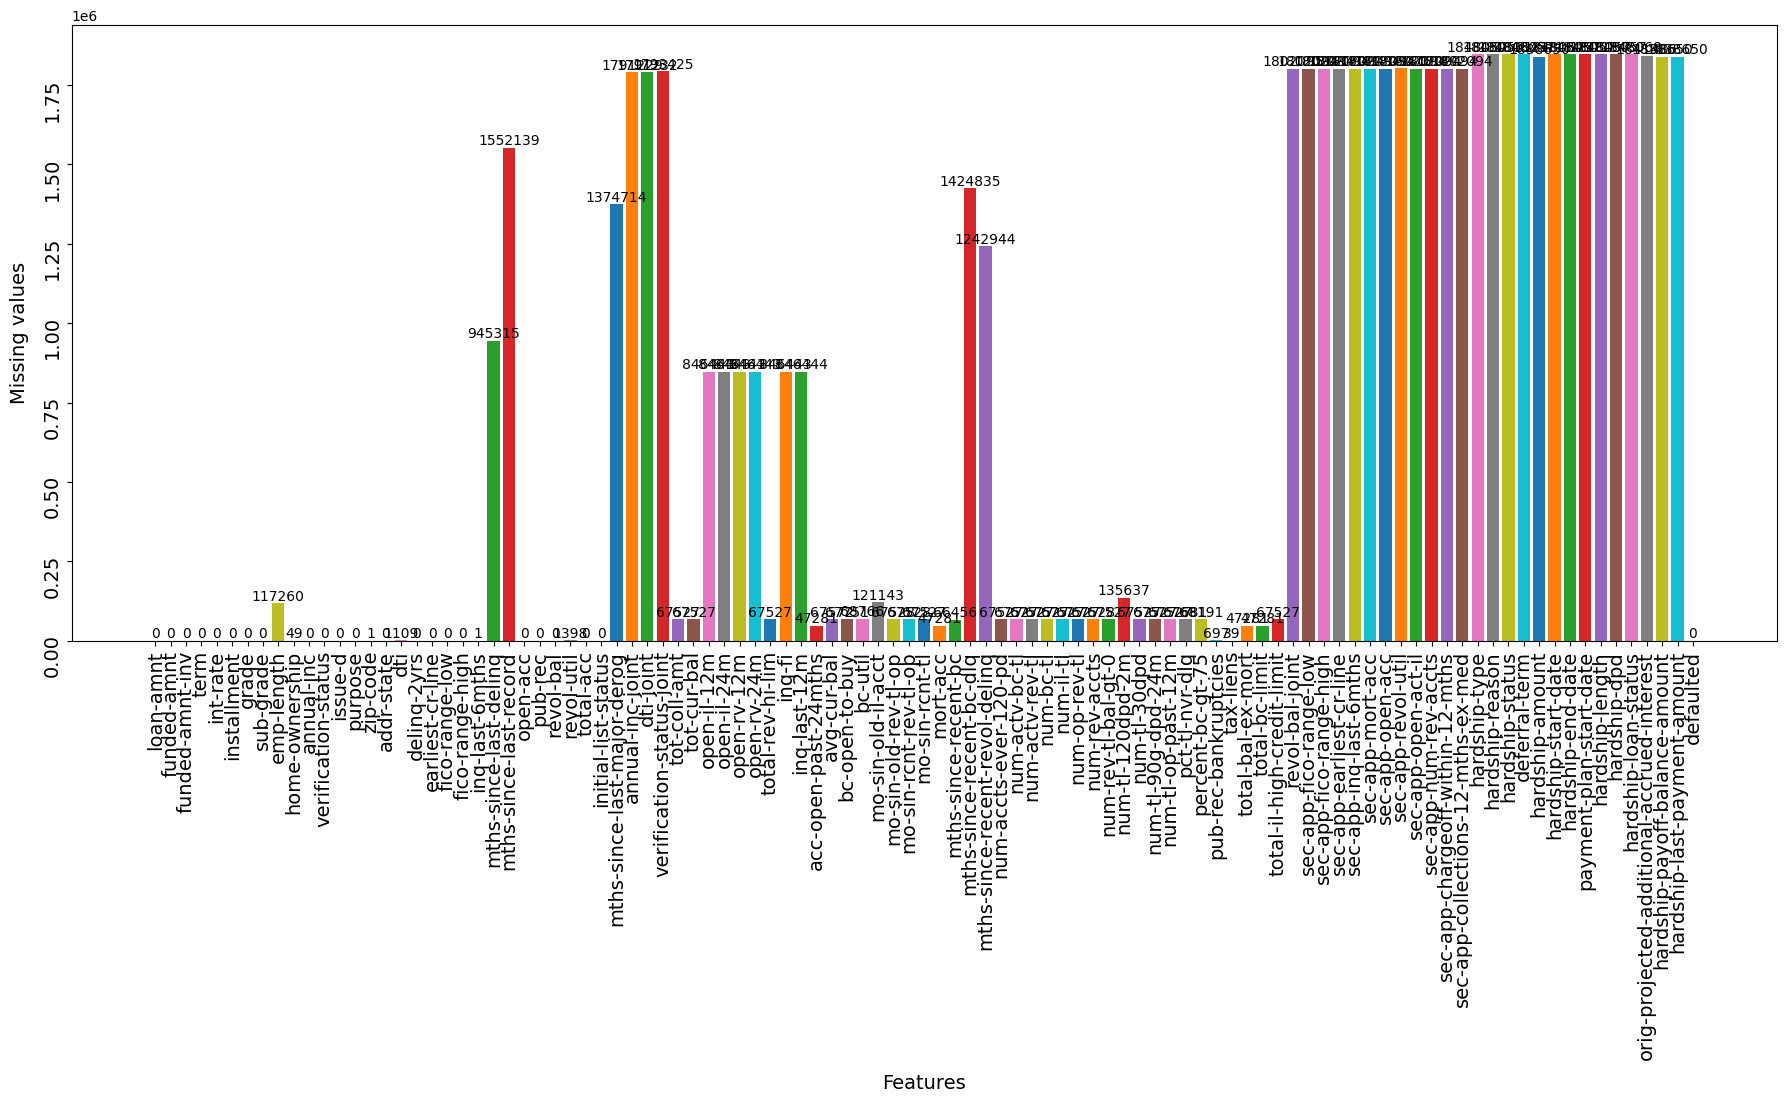

In [16]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(22,8),
                   rotated_ticks=True, save_path=lc_prep_dataset_path + 'missing_values-1.pdf')

#### Drop features with too many NANs.

In [17]:
data.drop(['mths-since-last-delinq', 'mths-since-last-record', 'mths-since-last-major-derog', 'annual-inc-joint', 'dti-joint', 'verification-status-joint', 'open-il-12m', 'open-il-24m', 'open-rv-12m', 'open-rv-24m', 'inq-fi', 'inq-last-12m', 'mths-since-recent-bc-dlq', 'mths-since-recent-revol-delinq', 'revol-bal-joint', 'sec-app-fico-range-low', 'sec-app-fico-range-high', 'sec-app-earliest-cr-line', 'sec-app-inq-last-6mths', 'sec-app-mort-acc', 'sec-app-open-acc', 'sec-app-revol-util', 'sec-app-open-act-il', 'sec-app-num-rev-accts', 'sec-app-chargeoff-within-12-mths', 'sec-app-collections-12-mths-ex-med', 'hardship-type', 'hardship-reason', 'hardship-status', 'deferral-term', 'hardship-amount', 'hardship-start-date', 'hardship-end-date', 'payment-plan-start-date', 'hardship-length', 'hardship-dpd', 'hardship-loan-status', 'orig-projected-additional-accrued-interest', 'hardship-payoff-balance-amount', 'hardship-last-payment-amount'], axis=1, inplace=True)

#### Plot missing values histogram.

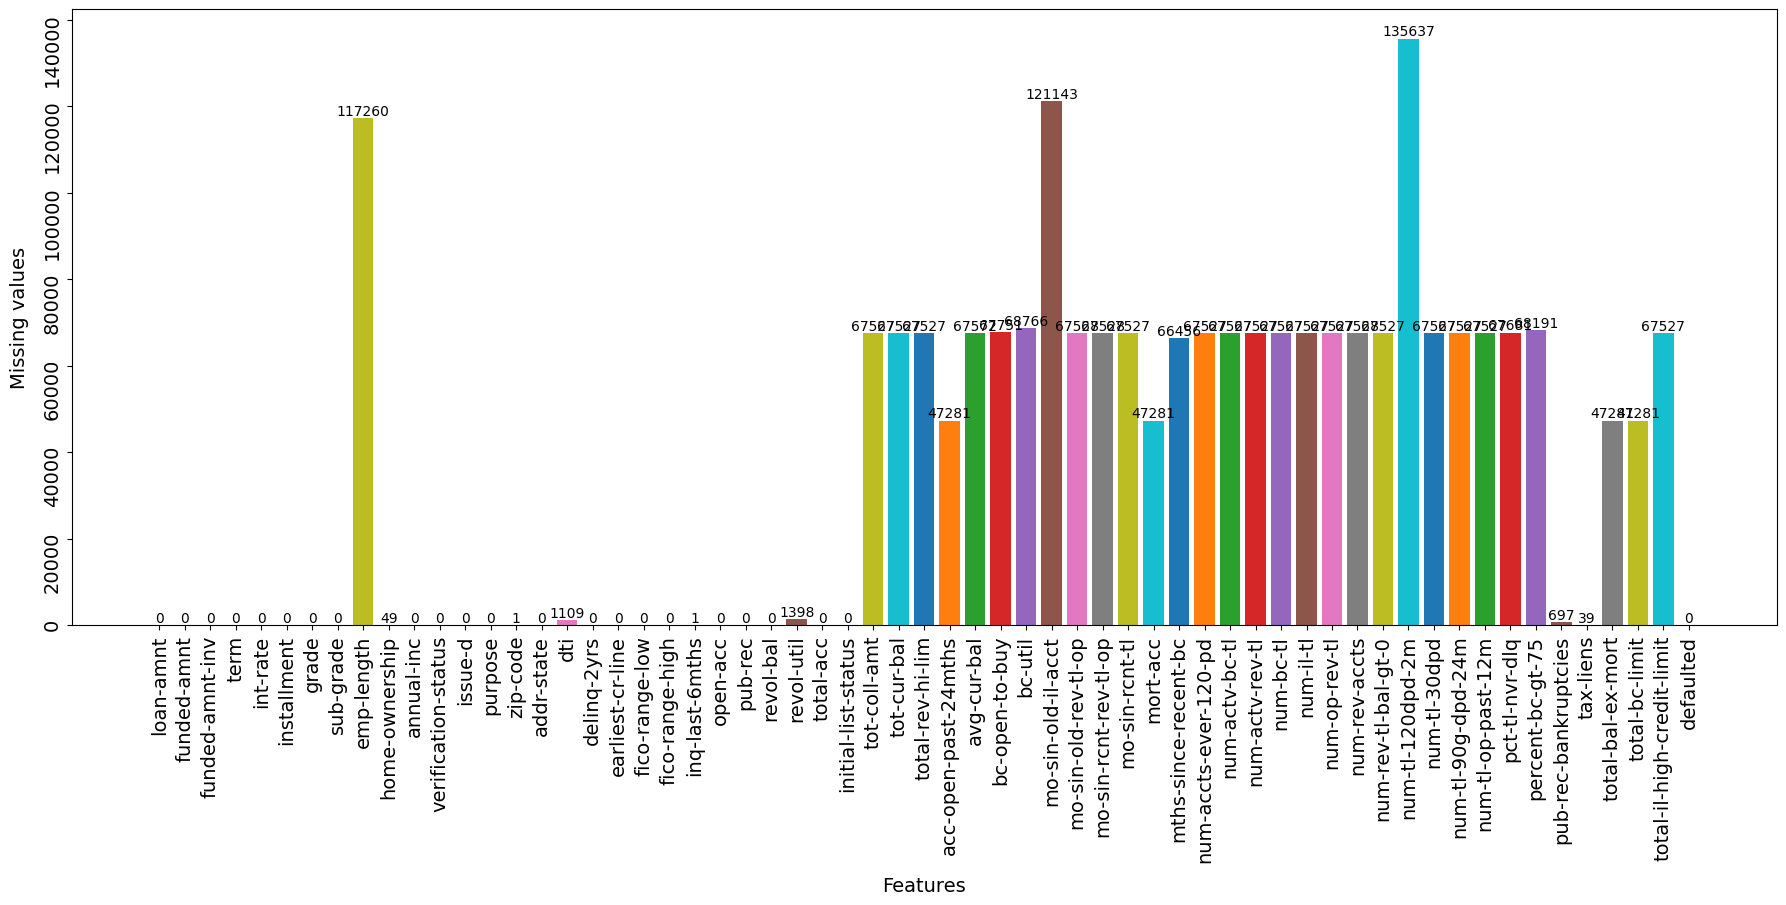

In [18]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(22,8),
                   rotated_ticks=True, save_path=lc_prep_dataset_path + 'missing_values-1.pdf')

#### Fix certain features for pre-processing.

In [19]:
data.select_dtypes(include=['category']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860764 entries, 0 to 2925492
Data columns (total 14 columns):
 #   Column               Dtype   
---  ------               -----   
 0   term                 category
 1   int-rate             category
 2   grade                category
 3   sub-grade            category
 4   emp-length           category
 5   home-ownership       category
 6   verification-status  category
 7   issue-d              category
 8   purpose              category
 9   zip-code             category
 10  addr-state           category
 11  earliest-cr-line     category
 12  revol-util           category
 13  initial-list-status  category
dtypes: category(14)
memory usage: 48.0 MB


In [20]:
data['term'].value_counts()

 36 months    1393606
 60 months     467158
Name: term, dtype: int64

In [21]:
data['int-rate'].value_counts()

 11.99%    42794
 10.99%    42601
  5.32%    41815
 13.99%    38503
 11.49%    30640
           ...  
 17.66%        0
 17.59%        0
 17.22%        0
 24.55%        0
 17.28%        0
Name: int-rate, Length: 704, dtype: int64

In [22]:
data['int-rate'] = data['int-rate'].str.rstrip('%').astype('float64') / 100.0
data['int-rate'].value_counts()

0.1199    42794
0.1099    42601
0.0532    41815
0.1399    38503
0.1149    30640
          ...  
0.1754        1
0.1690        1
0.1734        1
0.1671        1
0.1744        1
Name: int-rate, Length: 684, dtype: int64

In [23]:
data['grade'].value_counts()

B    546721
C    528265
A    346349
D    275088
E    116531
F     37115
G     10695
Name: grade, dtype: int64

In [24]:
data['sub-grade'].value_counts()

C1    118968
B5    116612
B4    115840
B3    109932
C2    108132
C3    103591
C4    102762
B2    102227
B1    102110
C5     94812
A5     89200
A4     77098
D1     69198
A1     67301
D2     63938
A3     57428
A2     55322
D3     54089
D4     47586
D5     40277
E1     29404
E2     26142
E3     22846
E4     19435
E5     18704
F1     11751
F2      8286
F3      6960
F4      5521
F5      4597
G1      3578
G2      2437
G3      1851
G4      1490
G5      1339
Name: sub-grade, dtype: int64

In [25]:
data['emp-length'].value_counts()

10+ years    611462
2 years      168545
< 1 year     153732
3 years      149311
1 year       122964
5 years      115894
4 years      112236
6 years       85369
8 years       78659
7 years       78153
9 years       67179
Name: emp-length, dtype: int64

In [26]:
data['emp-length'] = data['emp-length'].str.rstrip('year')
data['emp-length'] = data['emp-length'].str.rstrip('years')
data['emp-length'] = data['emp-length'].str.lstrip('< ')
data['emp-length'] = data['emp-length'].str.rstrip('+ ')
data['emp-length'] = data['emp-length'].astype('float64')
data['emp-length'].value_counts()

10.0    611462
1.0     276696
2.0     168545
3.0     149311
5.0     115894
4.0     112236
6.0      85369
8.0      78659
7.0      78153
9.0      67179
Name: emp-length, dtype: int64

In [27]:
data['home-ownership'].value_counts()

MORTGAGE    918219
RENT        735538
OWN         205639
ANY           1175
OTHER          144
Name: home-ownership, dtype: int64

In [28]:
data['verification-status'].value_counts()

Source Verified    734249
Not Verified       588491
Verified           538024
Name: verification-status, dtype: int64

In [29]:
data.replace("Source Verified", "Source-Verified", inplace=True)
data.replace("Not Verified", "Not-Verified", inplace=True)
data.replace("Verified", "Verified", inplace=True)
data['verification-status'].value_counts()

Source-Verified    734249
Not-Verified       588491
Verified           538024
Name: verification-status, dtype: int64

In [30]:
data['issue-d'].value_counts()

Mar-2016    57558
Oct-2015    45444
Jul-2015    43415
Dec-2015    41307
Oct-2014    38781
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue-d, Length: 160, dtype: int64

In [31]:
data['issue-d'] = data['issue-d'].astype('O')
data['issue-d'] = pd.to_datetime(data['issue-d'], format='%b-%Y')
data['year-issued'] = data['issue-d'].dt.year.astype('category')
data['month-issued'] = data['issue-d'].dt.month.astype('category')
data.drop(['issue-d'], axis=1, inplace=True)

In [32]:
data['year-issued'].value_counts()

2016    403104
2015    402837
2017    314368
2014    235619
2018    197178
2013    134814
2019     75405
2012     53367
2011     21721
2010     11536
2009      4716
2020      4286
2008      1562
2007       251
Name: year-issued, dtype: int64

In [33]:
data['month-issued'].value_counts()

10    180001
7     174703
3     173330
4     158680
8     157693
11    156028
1     153662
5     152160
12    145111
6     142361
2     138731
9     128304
Name: month-issued, dtype: int64

In [34]:
data['purpose'].value_counts()

debt_consolidation    1063714
credit_card            412927
home_improvement       123888
other                  113619
major_purchase          41760
medical                 22584
small_business          20519
car                     20219
vacation                13336
moving                  13204
house                   11108
wedding                  2298
renewable_energy         1261
educational               327
Name: purpose, dtype: int64

In [35]:
data['zip-code'].value_counts()

945xx    20067
750xx    19684
112xx    19186
606xx    17099
300xx    16818
         ...  
732xx        0
733xx        0
867xx        0
848xx        0
002xx        0
Name: zip-code, Length: 962, dtype: int64

In [36]:
data['addr-state'].value_counts()

CA    264525
TX    152990
NY    150911
FL    133643
IL     72623
NJ     66982
PA     62774
OH     61150
GA     60592
NC     52062
VA     51929
MI     48661
AZ     45521
MD     43593
MA     42719
CO     40501
WA     39944
MN     32966
IN     30728
MO     29725
TN     29092
CT     28161
NV     27866
WI     24834
AL     22802
OR     22555
SC     22489
LA     21072
KY     17917
OK     16964
KS     15489
AR     14087
UT     13463
NM     10028
MS      9932
HI      9050
NH      9049
RI      8191
WV      6551
NE      6009
DE      5264
MT      5257
DC      4549
AK      4343
WY      3984
VT      3877
SD      3773
ME      3583
ID      3313
ND      2674
IA         7
Name: addr-state, dtype: int64

In [37]:
data['earliest-cr-line'].value_counts()

Sep-2003    12568
Sep-2004    12563
Aug-2001    12174
Aug-2002    12113
Aug-2003    12028
            ...  
Oct-1956        0
Apr-1959        0
Dec-1953        0
Sep-1951        0
Jul-1953        0
Name: earliest-cr-line, Length: 777, dtype: int64

In [38]:
data['earliest-cr-line'] = data['earliest-cr-line'].astype('O')
data['earliest-cr-line'] = pd.to_datetime(data['earliest-cr-line'], format='%b-%Y')
data['year-earliest-cr-line'] = data['earliest-cr-line'].dt.year.astype('category')
data['month-earliest-cr-line'] = data['earliest-cr-line'].dt.month.astype('category')
data.drop(['earliest-cr-line'], axis=1, inplace=True)

In [39]:
data['year-earliest-cr-line'].value_counts()

2004    117757
2003    117731
2001    115213
2002    114357
2005    111144
         ...  
1948         2
1949         1
1945         1
1941         1
1933         1
Name: year-earliest-cr-line, Length: 76, dtype: int64

In [40]:
data['month-earliest-cr-line'].value_counts()

8     186346
9     182169
10    177627
11    162495
3     151658
7     150544
12    147959
5     145478
6     144833
4     141472
1     135099
2     135084
Name: month-earliest-cr-line, dtype: int64

In [41]:
data['revol-util'].value_counts()

0%        10919
48%        3550
57%        3539
59%        3517
53%        3505
          ...  
118.5%        0
129.9%        0
115.9%        0
115.2%        0
30.19%        0
Name: revol-util, Length: 1443, dtype: int64

In [42]:
data['revol-util'] = data['revol-util'].str.rstrip('%').astype('float64') / 100.0
data['revol-util'].value_counts()

0.0000    10919
0.4800     3550
0.5700     3539
0.5900     3517
0.5300     3505
          ...  
0.4963        1
0.0004        1
0.0728        1
1.4040        1
1.2520        1
Name: revol-util, Length: 1406, dtype: int64

In [43]:
data['initial-list-status'].value_counts()

w    1195246
f     665518
Name: initial-list-status, dtype: int64

#### Fix features for which binning returns (-inf, inf).

In [44]:
data['delinq-2yrs'] = data['delinq-2yrs'].astype('category')
data['pub-rec'] = data['pub-rec'].astype('category')
data['tot-coll-amt'] = data['tot-coll-amt'].astype('category')
data['num-accts-ever-120-pd'] = data['num-accts-ever-120-pd'].astype('category')
data['num-tl-120dpd-2m'] = data['num-tl-120dpd-2m'].astype('category')
data['num-tl-30dpd'] = data['num-tl-30dpd'].astype('category')
data['num-tl-90g-dpd-24m'] = data['num-tl-90g-dpd-24m'].astype('category')
data['pub-rec-bankruptcies'] = data['pub-rec-bankruptcies'].astype('category')
data['tax-liens'] = data['tax-liens'].astype('category')

#### Apply optimal binninf and WoE.

In [45]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=lc_prep_dataset_path,
                                                  verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:59<00:00,  1.06it/s]


In [46]:
data

,loan-amnt,funded-amnt,funded-amnt-inv,term,int-rate,installment,grade,sub-grade,emp-length,home-ownership,...,pub-rec-bankruptcies,tax-liens,total-bal-ex-mort,total-bc-limit,total-il-high-credit-limit,defaulted,year-issued,month-issued,year-earliest-cr-line,month-earliest-cr-line
0,0.281042,0.281025,0.280151,0.267659,0.341951,0.254198,0.437300,0.595884,0.089547,-0.189238,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.209247,0.000985
1,0.440559,0.440436,0.434261,-0.618902,-0.299855,0.495895,-0.173846,-0.305631,-0.055511,-0.189238,...,0.026936,-0.000023,0.000000,0.000000,0.000000,True,0.298613,-0.008539,0.066814,-0.015901
2,0.440559,0.440436,0.434261,0.267659,-0.299855,0.495895,-0.173846,-0.375632,0.089547,-0.189238,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.022188,-0.021878
3,-0.008787,-0.009094,-0.009530,0.267659,-0.020657,-0.096231,-0.173846,0.044236,0.089547,-0.189238,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.088674,-0.005674
4,0.440559,0.440436,0.434261,-0.618902,-0.020657,0.495895,0.437300,0.198875,-0.055511,-0.189238,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.088674,0.000985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,-0.173335,-0.173891,-0.173631,-0.618902,-0.990957,-0.154523,-1.006994,-0.780134,-0.055511,-0.189238,...,-0.179211,-0.000023,-0.037942,0.113658,-0.021931,True,-0.096884,0.002686,0.088674,-0.015901
2925489,-0.008787,-0.009094,-0.009530,0.267659,0.782278,0.025149,1.255042,0.808266,0.089547,0.178992,...,0.026936,-0.000023,-0.037942,0.178352,-0.021931,False,-0.096884,0.002686,0.172469,0.023270
2925490,-0.008787,-0.009094,-0.009530,0.267659,-0.500558,-0.096231,-0.575481,-0.482222,0.031473,-0.189238,...,0.026936,-0.000023,0.033660,-0.131167,0.069021,True,-0.096884,0.002686,0.172469,-0.008230
2925491,0.281042,0.281025,0.280151,0.267659,0.296448,0.254198,0.437300,0.319718,0.010229,-0.189238,...,0.026936,-0.000023,-0.015776,-0.131167,-0.021931,False,-0.096884,0.002686,0.209247,-0.008230


#### All missing values handled.

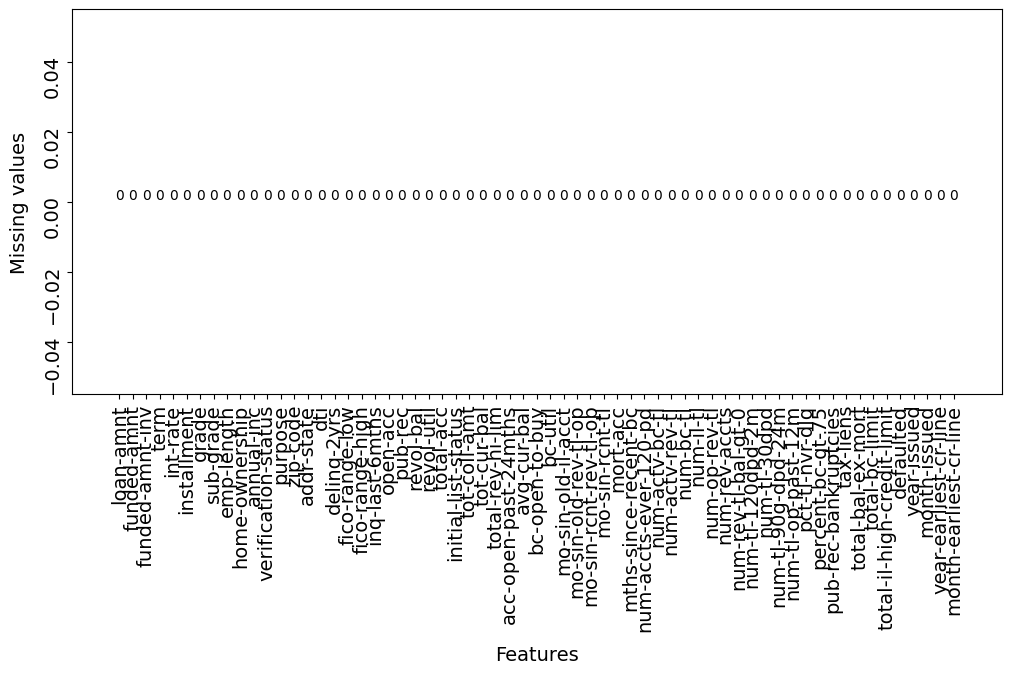

In [47]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(12,5),
                   rotated_ticks=True, save_path=lc_prep_dataset_path + 'missing_values-2.pdf')

/home/debian/DevOps/credit_scoring_benchmark/src/plotting.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=size, dpi=dpi, facecolor='w', edgecolor='k')


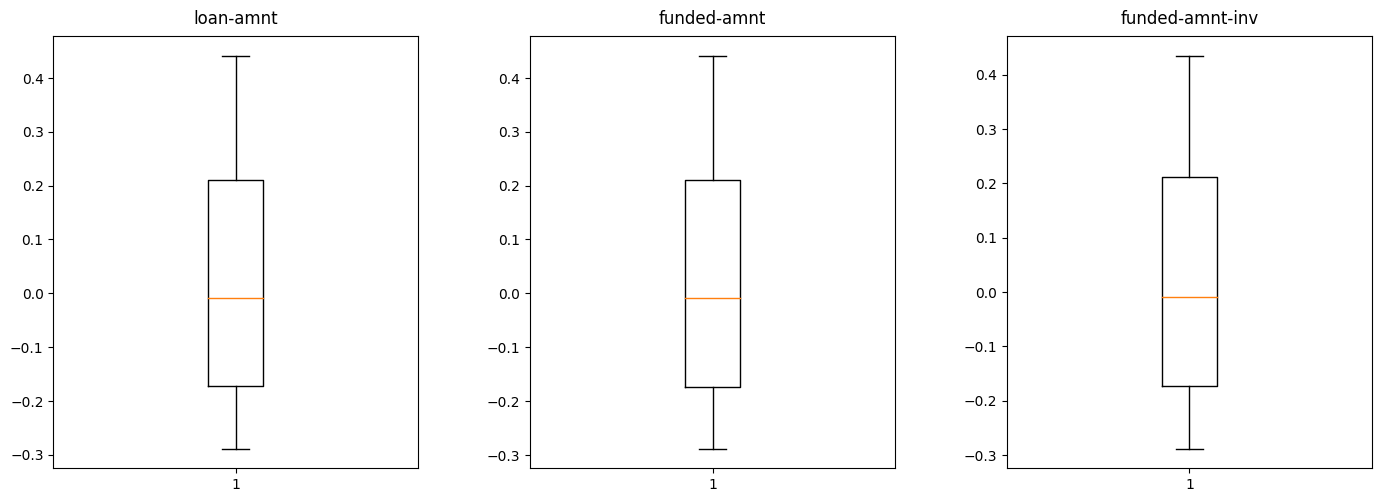

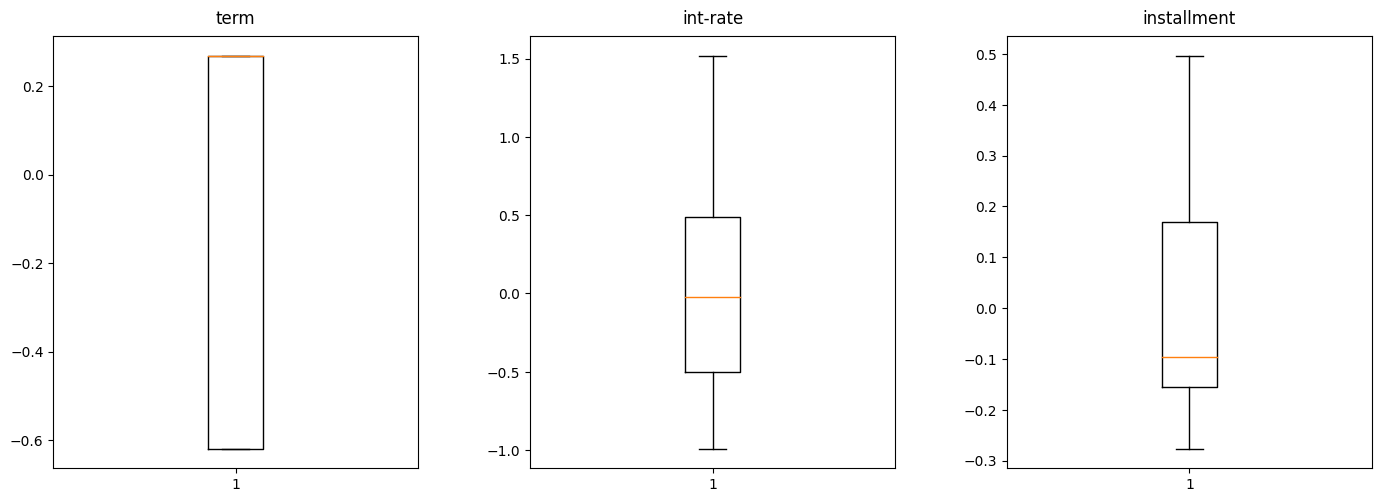

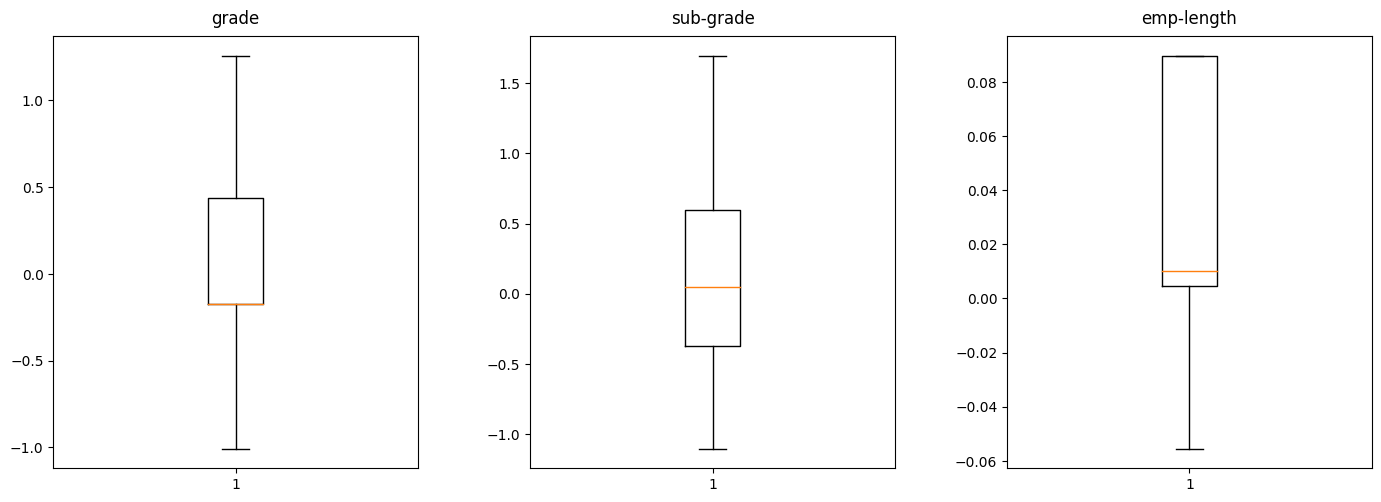

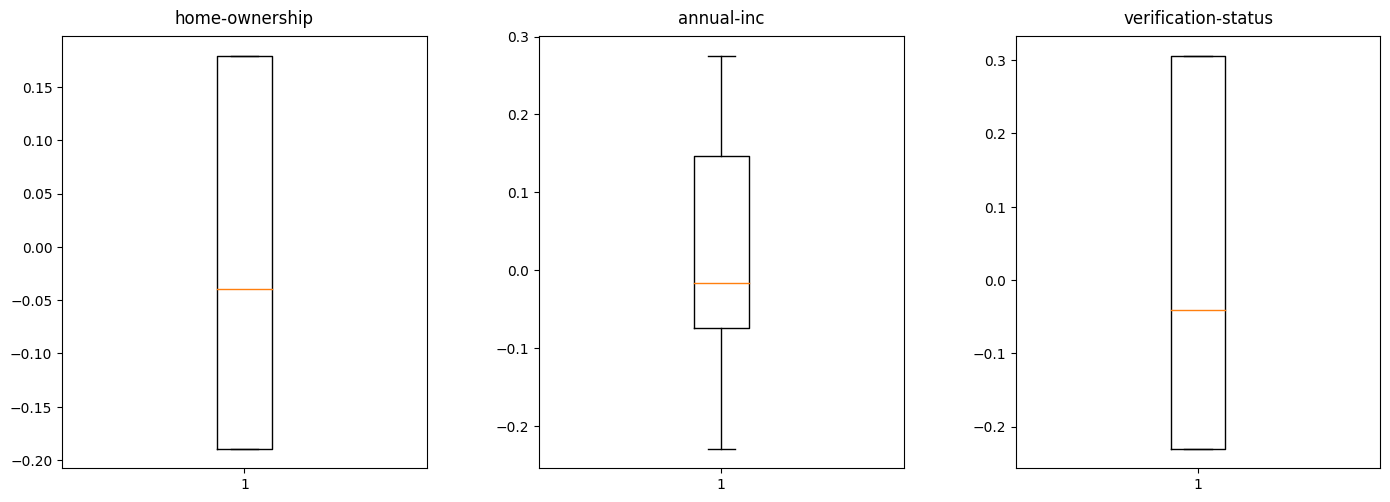

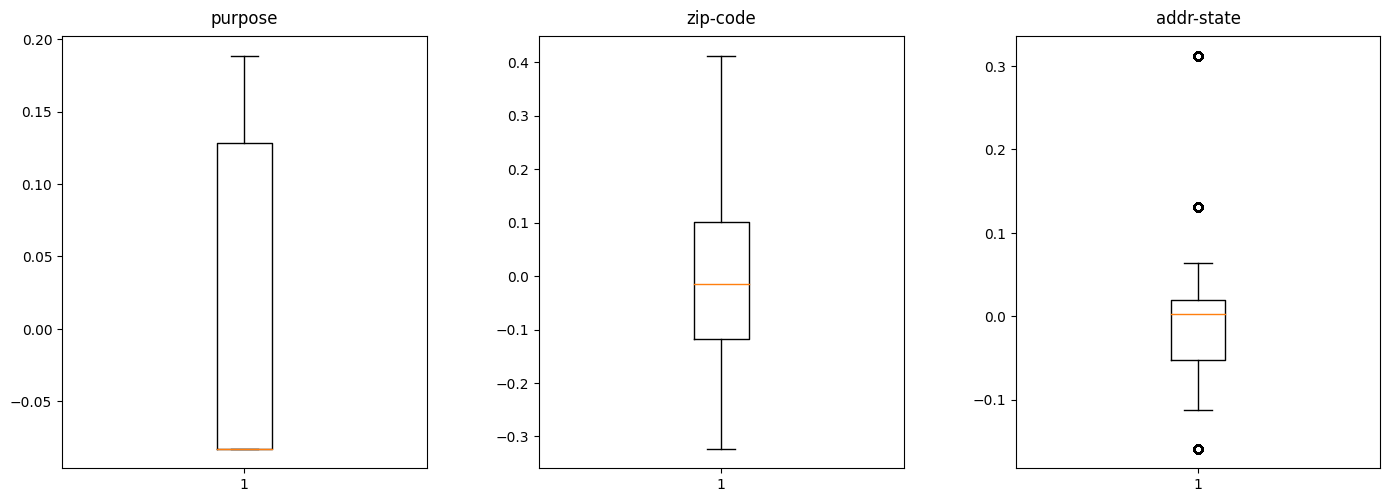

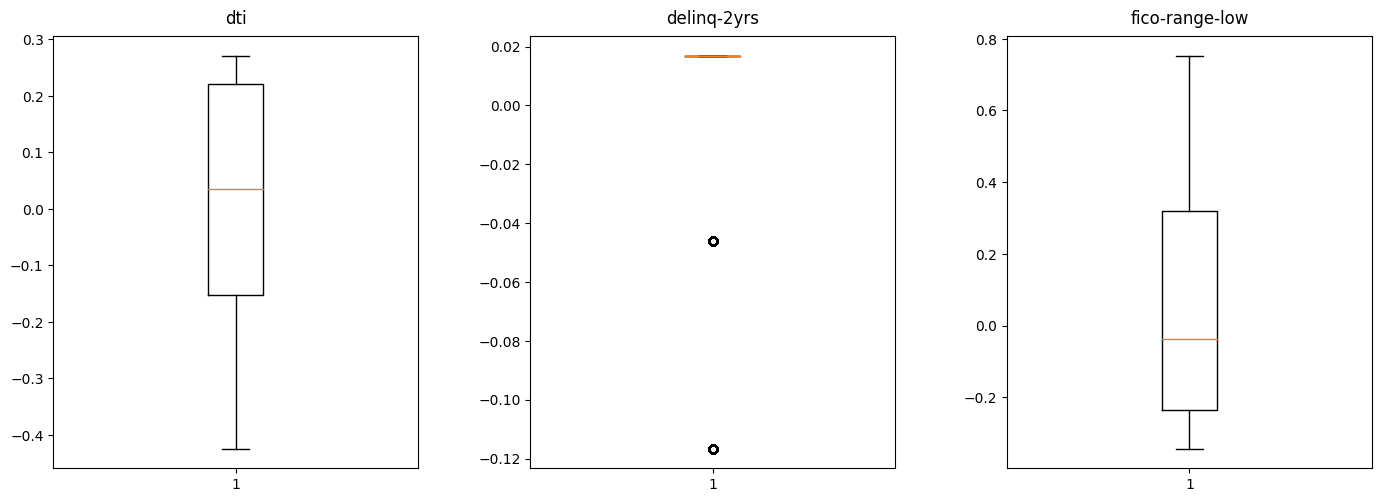

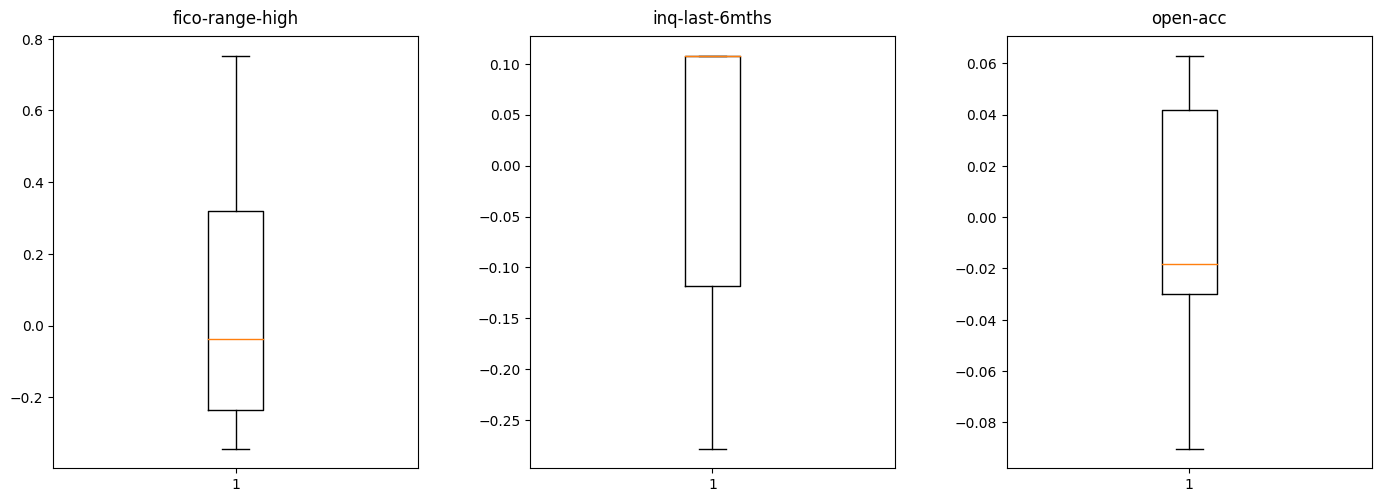

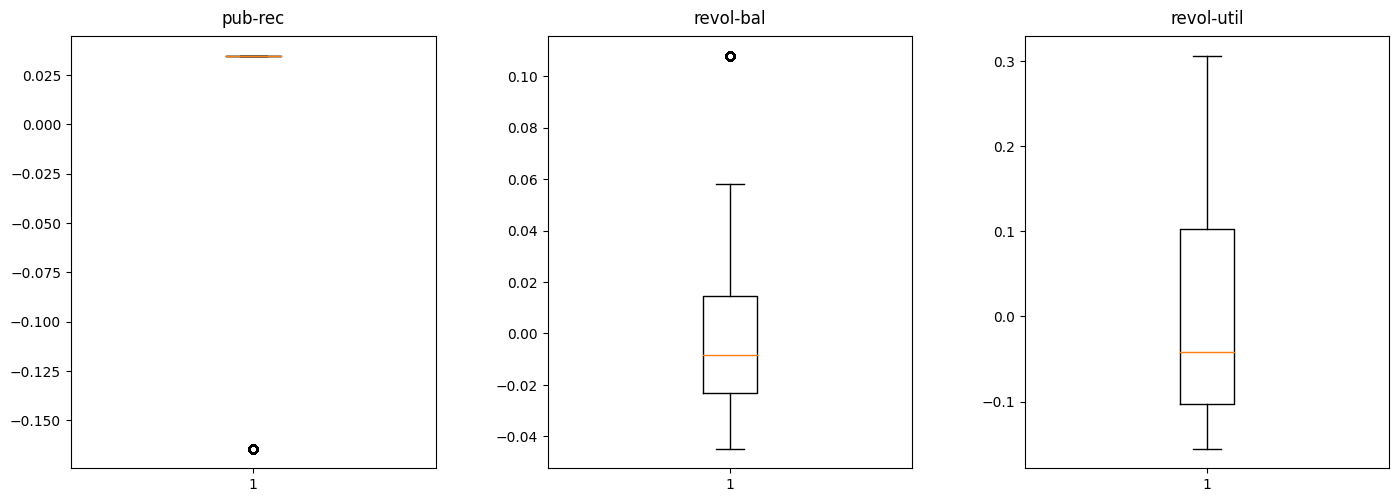

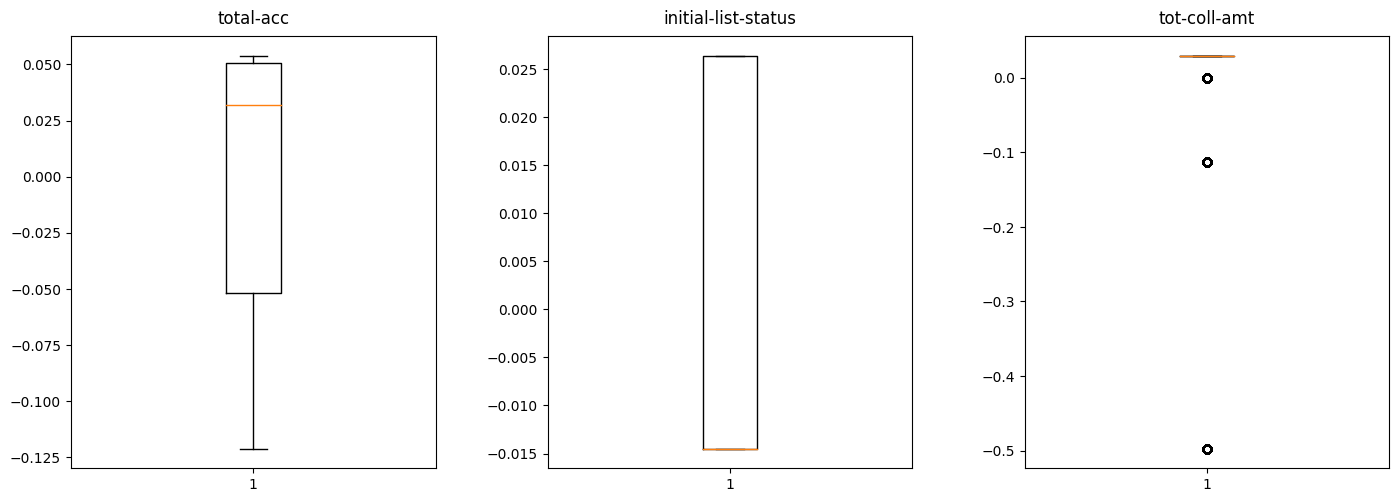

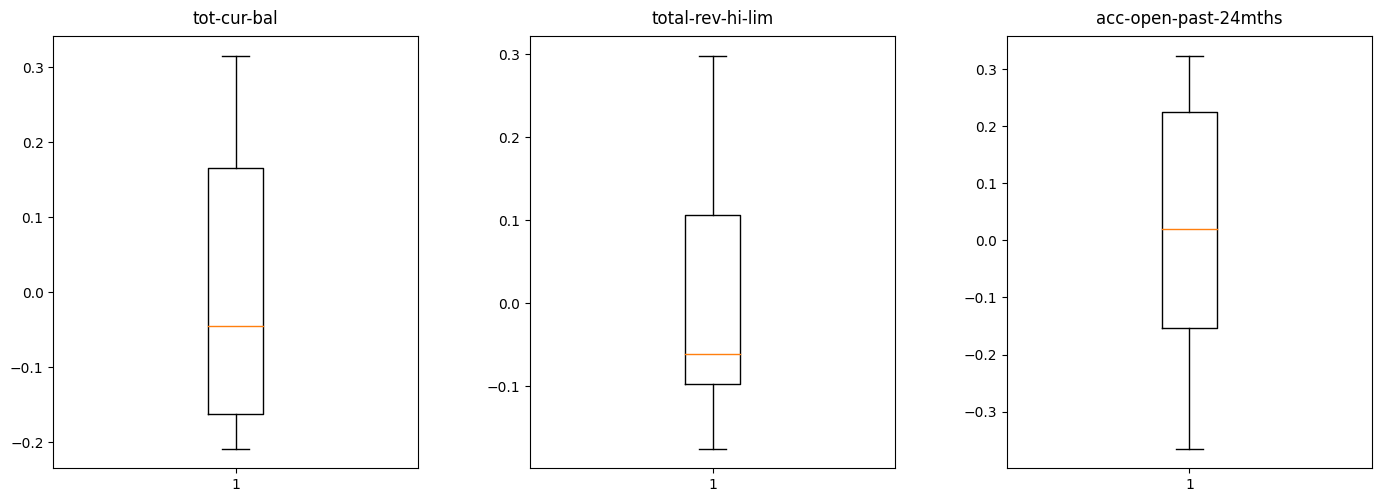

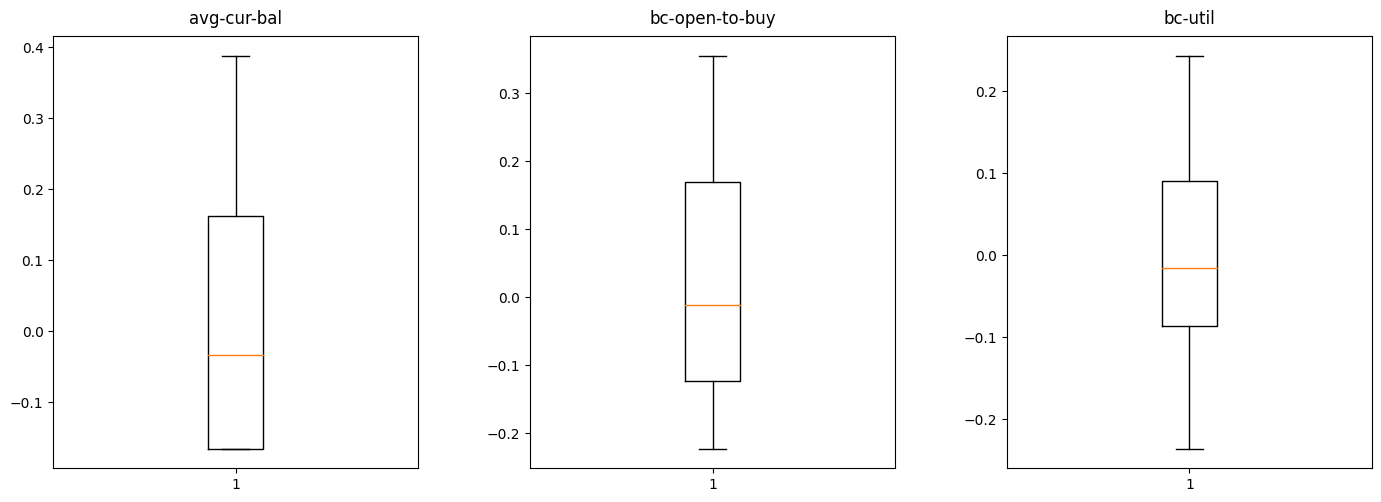

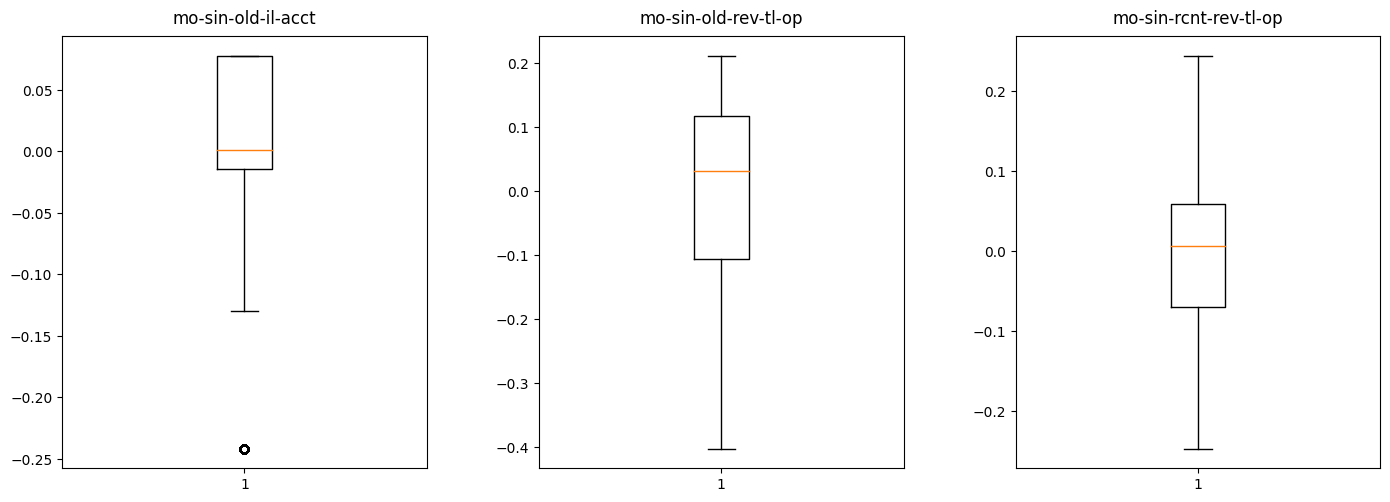

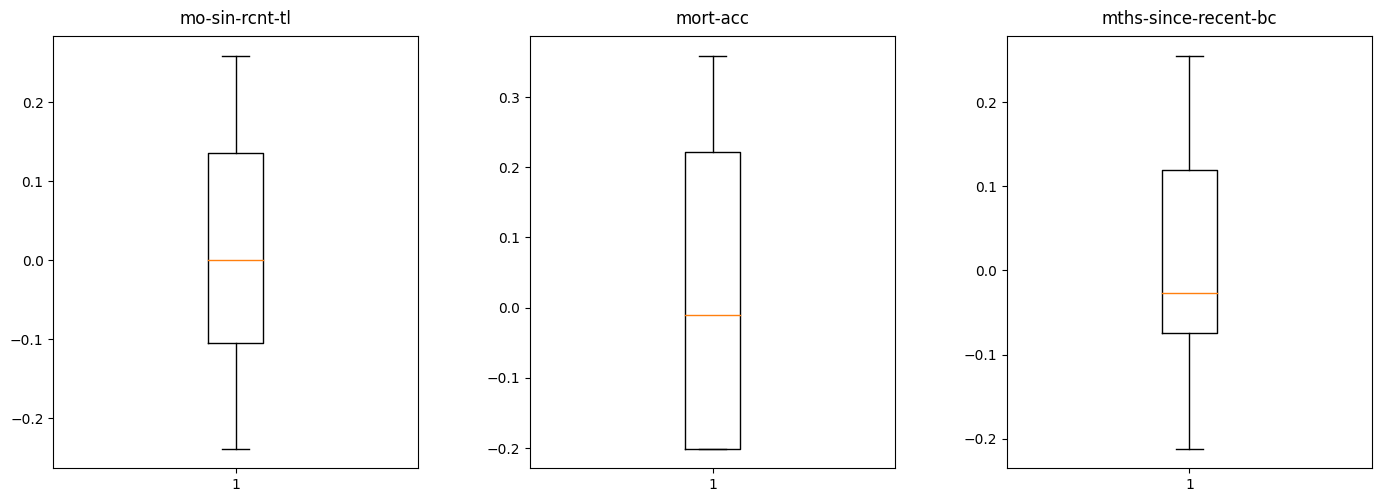

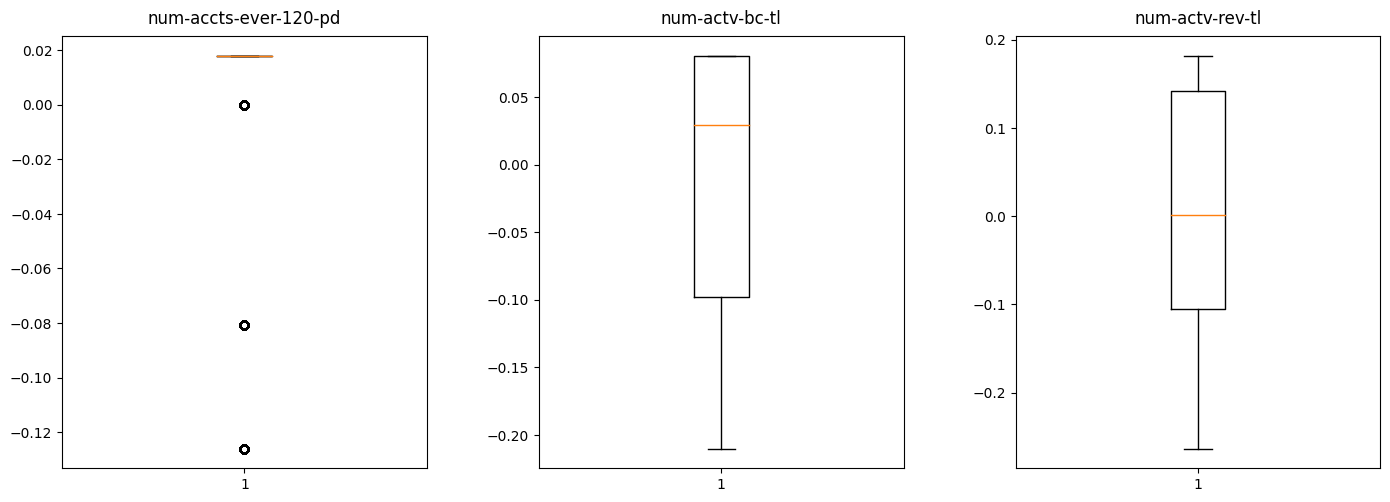

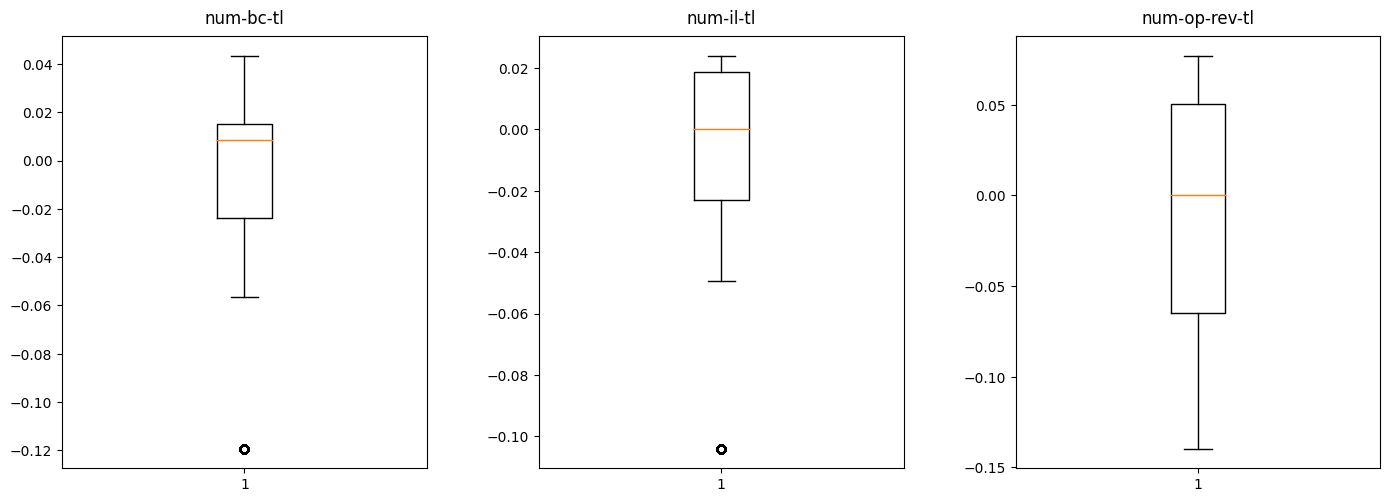

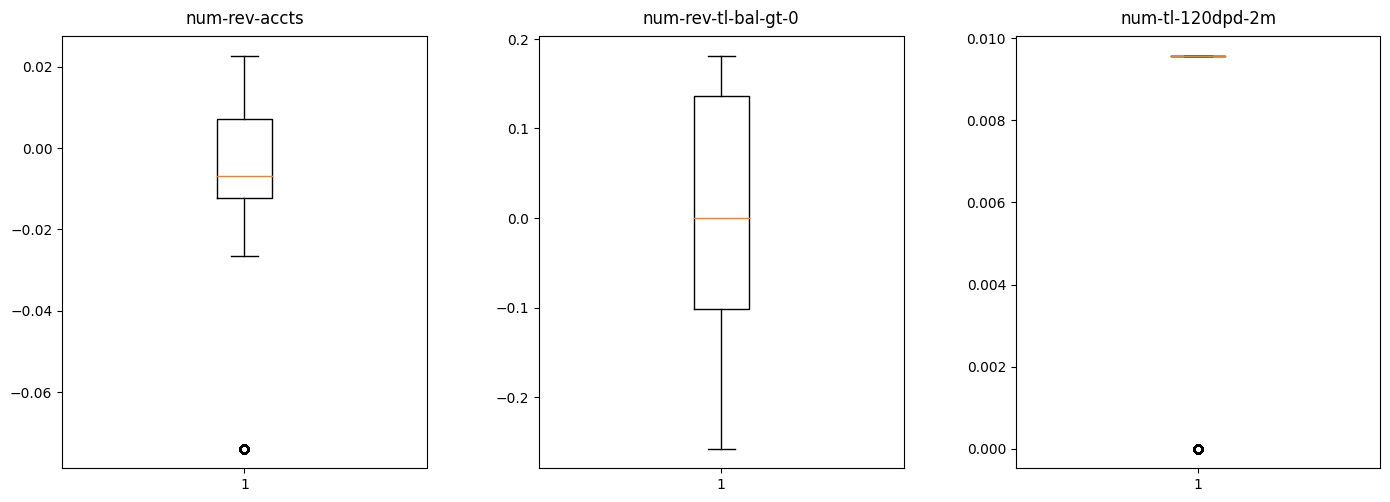

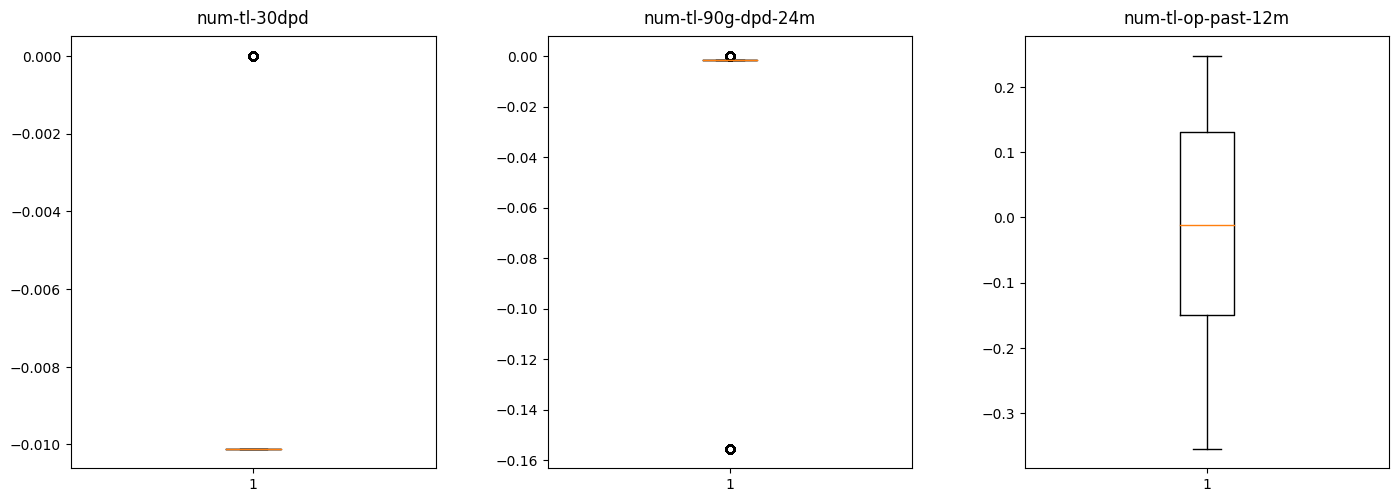

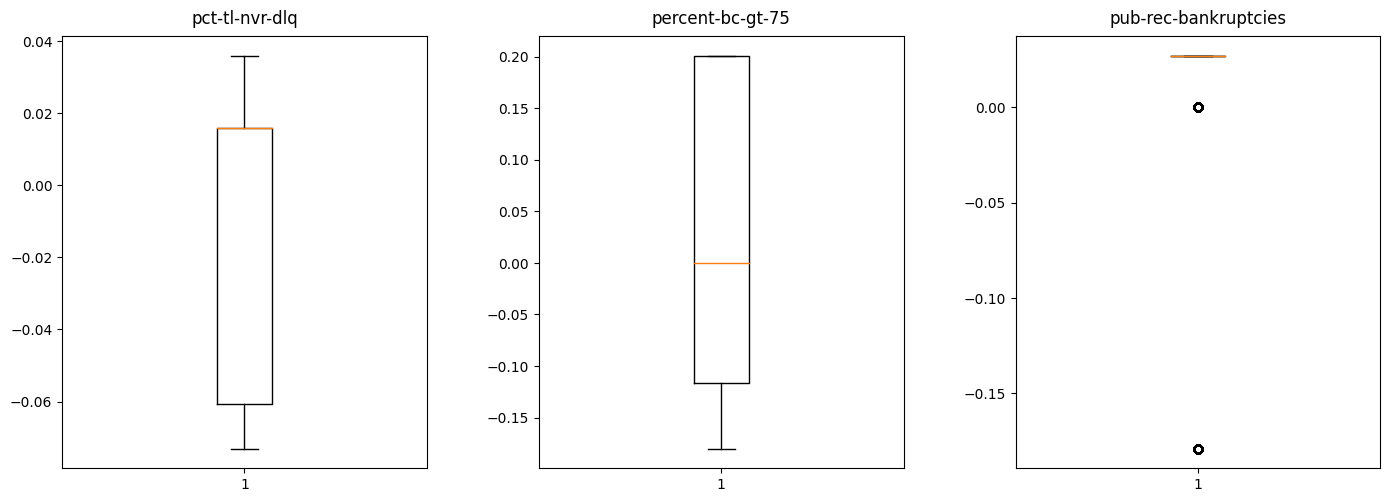

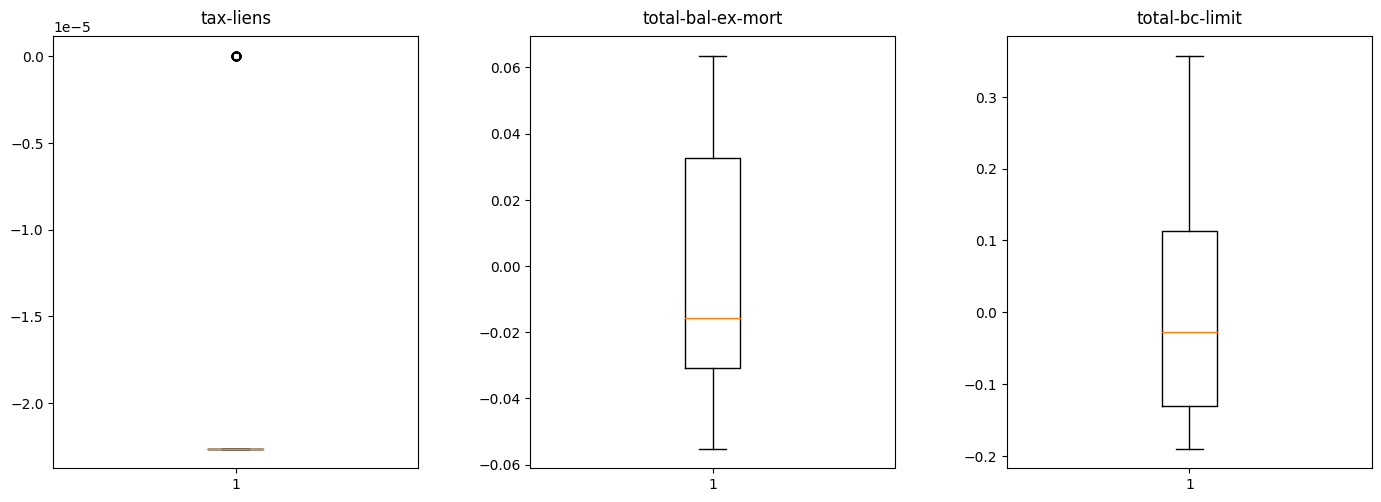

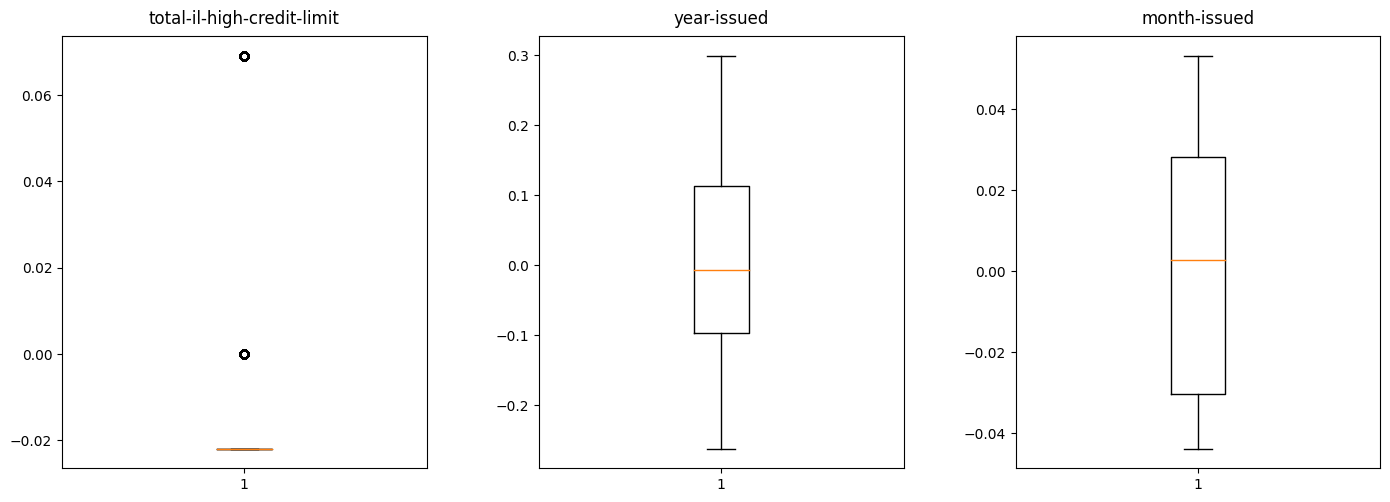

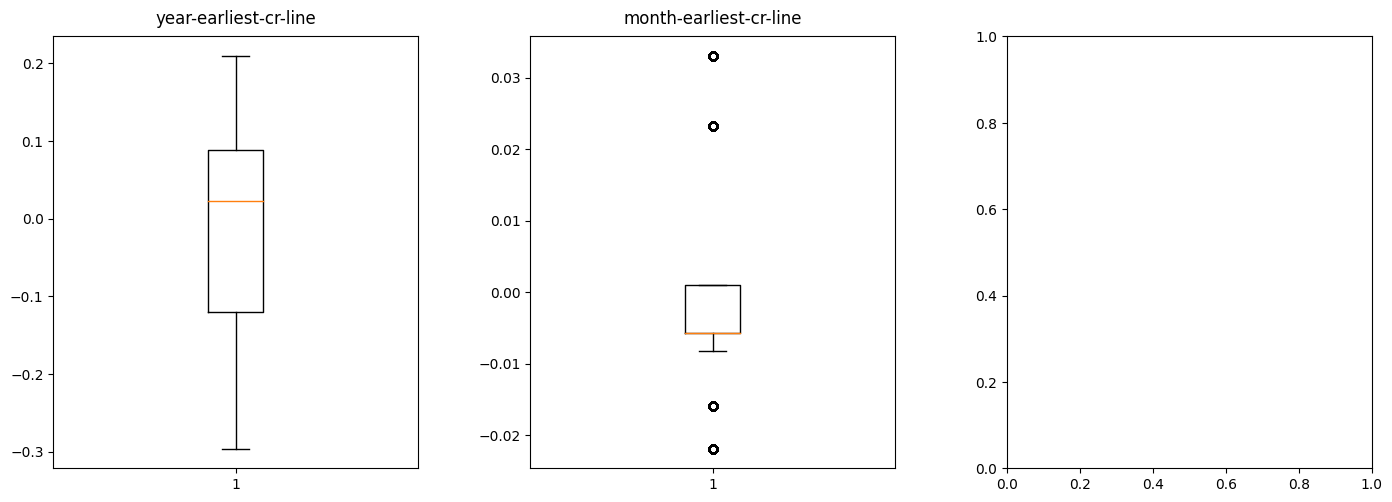

In [48]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=lc_prep_dataset_path)

In [49]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=lc_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

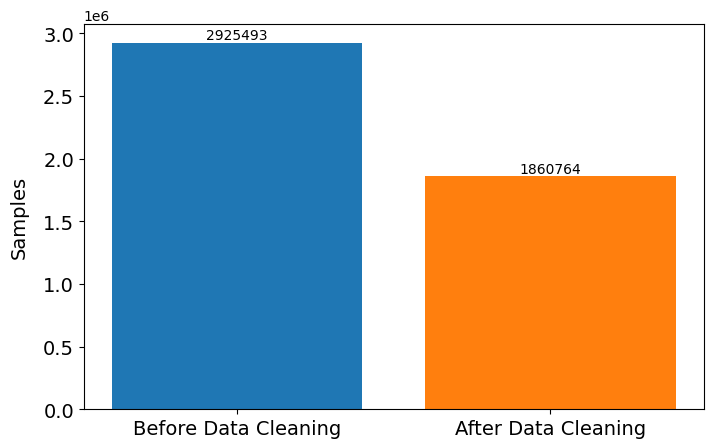

In [50]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=lc_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

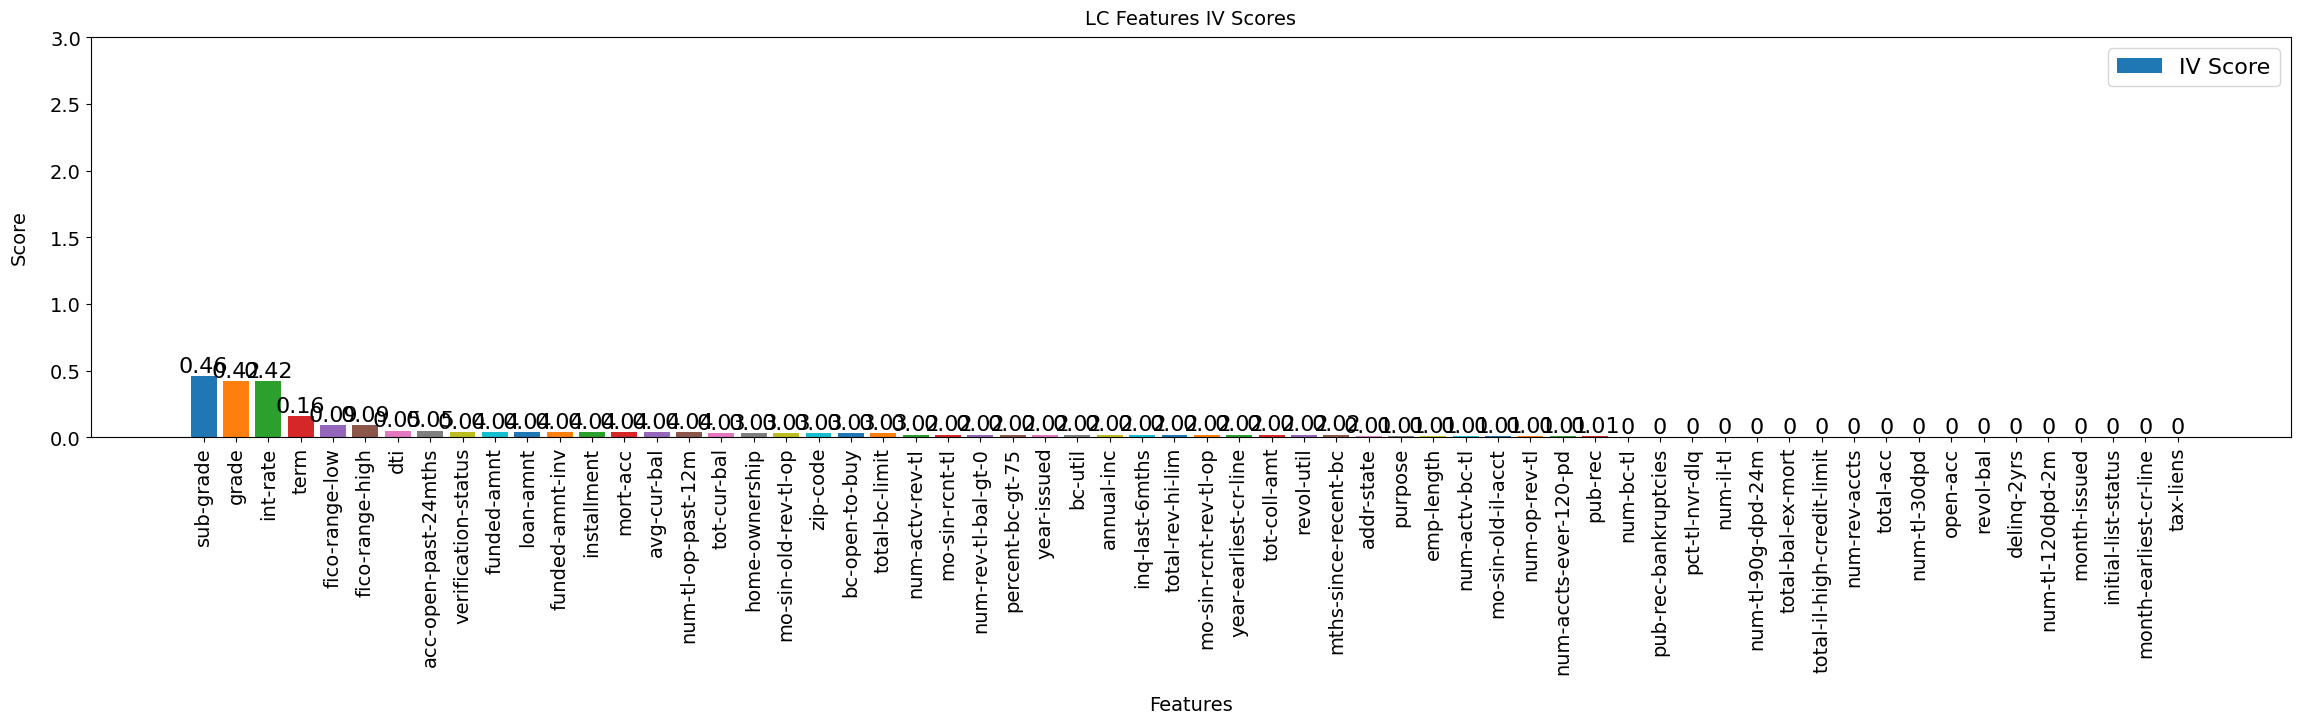

In [51]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'LC Features IV Scores', figsize=(22, 4))

#### Features correlation

In [52]:
f_corr = preprocessing.features_correlation(data=data)

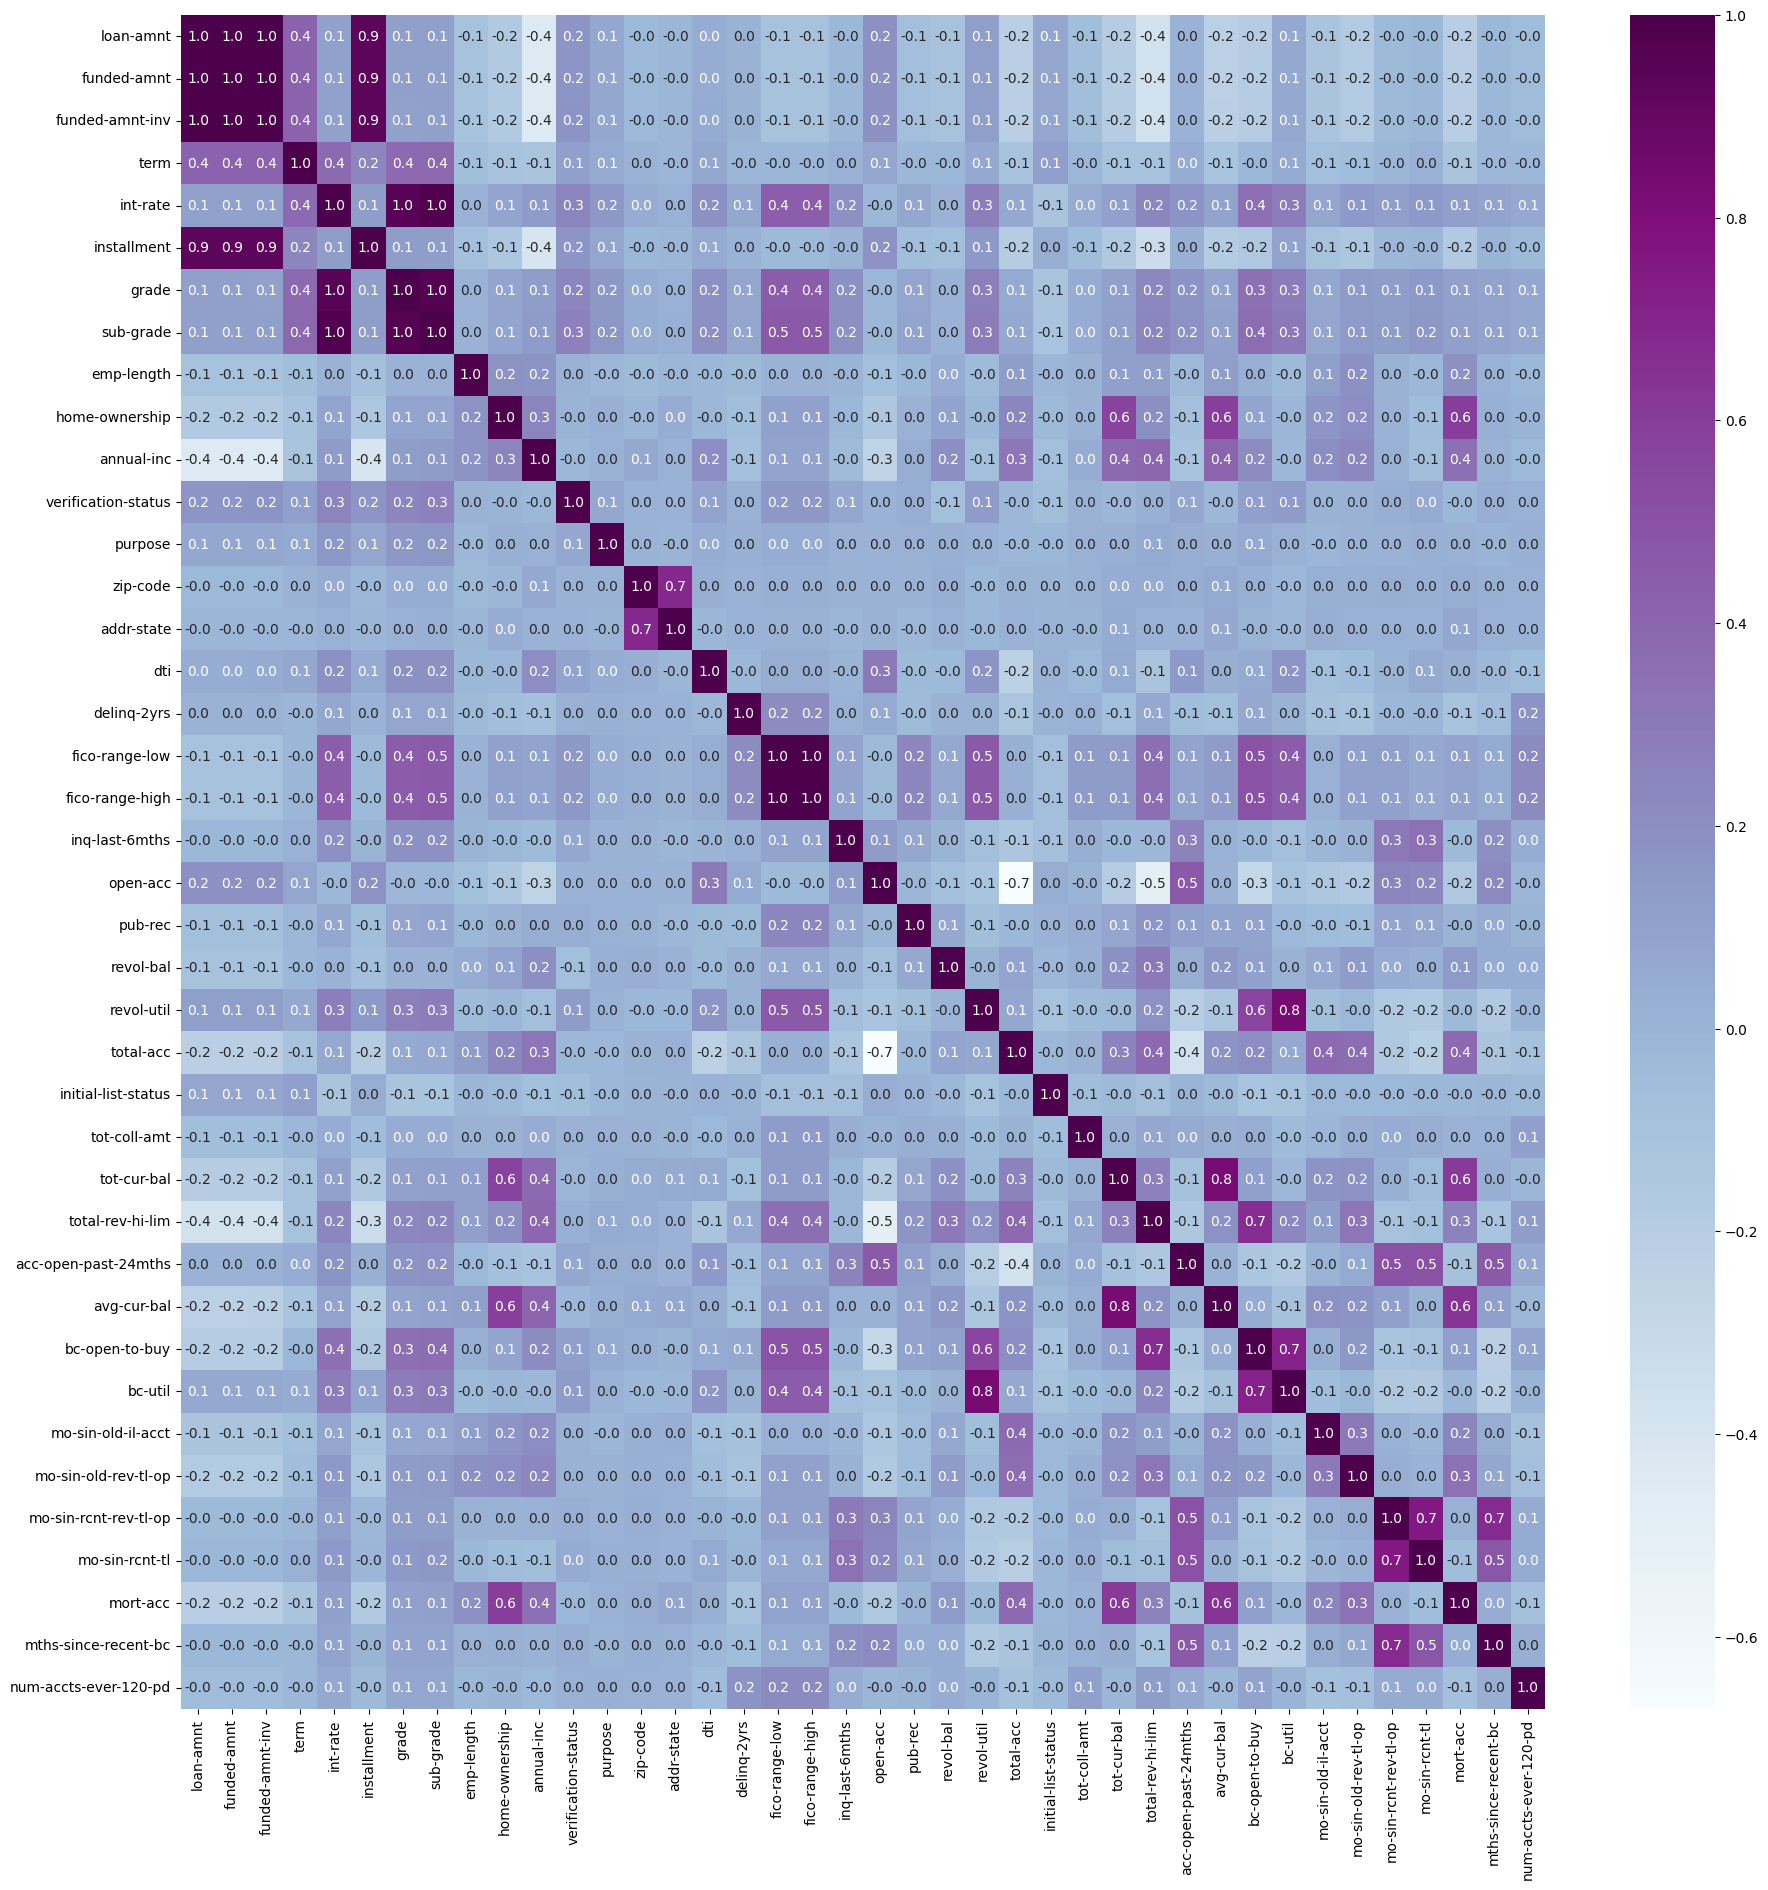

In [53]:
plotting.plot_heatmap(f_corr.iloc[:40,:40], figsize=(22, 22), save_path=lc_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [54]:
data.drop(['int-rate', 'fico-range-high', 'funded-amnt', 'funded-amnt-inv', 'installment', 'grade', 'addr-state', 'open-acc', 'revol-util', 'tot-cur-bal', 'num-actv-rev-tl', 'num-actv-bc-tl', 'num-op-rev-tl', 'bc-util'], axis=1, inplace=True)

#### Save preprocessed dataset.

In [55]:
data

,loan-amnt,term,sub-grade,emp-length,home-ownership,annual-inc,verification-status,purpose,zip-code,dti,...,pub-rec-bankruptcies,tax-liens,total-bal-ex-mort,total-bc-limit,total-il-high-credit-limit,defaulted,year-issued,month-issued,year-earliest-cr-line,month-earliest-cr-line
0,0.281042,0.267659,0.595884,0.089547,-0.189238,-0.229103,-0.230196,0.188392,0.041475,-0.270359,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.209247,0.000985
1,0.440559,-0.618902,-0.305631,-0.055511,-0.189238,-0.229103,-0.041493,0.188392,0.041475,0.270438,...,0.026936,-0.000023,0.000000,0.000000,0.000000,True,0.298613,-0.008539,0.066814,-0.015901
2,0.440559,0.267659,-0.375632,0.089547,-0.189238,-0.229103,0.305750,-0.082829,0.183954,0.270438,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.022188,-0.021878
3,-0.008787,0.267659,0.044236,0.089547,-0.189238,-0.074007,-0.041493,-0.037847,-0.054583,-0.031358,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.088674,-0.005674
4,0.440559,-0.618902,0.198875,-0.055511,-0.189238,0.070188,-0.041493,-0.037847,0.411696,0.034483,...,0.026936,-0.000023,0.000000,0.000000,0.000000,False,0.298613,-0.008539,0.088674,0.000985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,-0.173335,-0.618902,-0.780134,-0.055511,-0.189238,0.229837,-0.041493,-0.037847,0.411696,0.221466,...,-0.179211,-0.000023,-0.037942,0.113658,-0.021931,True,-0.096884,0.002686,0.088674,-0.015901
2925489,-0.008787,0.267659,0.808266,0.089547,0.178992,-0.016472,-0.041493,-0.082829,0.005388,-0.031358,...,0.026936,-0.000023,-0.037942,0.178352,-0.021931,False,-0.096884,0.002686,0.172469,0.023270
2925490,-0.008787,0.267659,-0.482222,0.031473,-0.189238,-0.171414,0.305750,-0.082829,0.183954,-0.031358,...,0.026936,-0.000023,0.033660,-0.131167,0.069021,True,-0.096884,0.002686,0.172469,-0.008230
2925491,0.281042,0.267659,0.319718,0.010229,-0.189238,-0.120528,-0.041493,0.188392,-0.116852,-0.031358,...,0.026936,-0.000023,-0.015776,-0.131167,-0.021931,False,-0.096884,0.002686,0.209247,-0.008230


In [56]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860764 entries, 0 to 2925492
Data columns (total 49 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan-amnt                   float64
 1   term                        float64
 2   sub-grade                   float64
 3   emp-length                  float64
 4   home-ownership              float64
 5   annual-inc                  float64
 6   verification-status         float64
 7   purpose                     float64
 8   zip-code                    float64
 9   dti                         float64
 10  delinq-2yrs                 float64
 11  fico-range-low              float64
 12  inq-last-6mths              float64
 13  pub-rec                     float64
 14  revol-bal                   float64
 15  total-acc                   float64
 16  initial-list-status         float64
 17  tot-coll-amt                float64
 18  total-rev-hi-lim            float64
 19  acc-open-past-24mths 

**EMP-$p_1$:**

In [57]:
len(data[data['defaulted'] == True])/len(data)

0.1950709493519866

**EMP-$p_0$:**

In [58]:
len(data[data['defaulted'] == False])/len(data)

0.8049290506480133

In [59]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=lc_prep_dataset_path)

Train split size: 1488611
Test split size: 372153
